<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/embeddings/voyageai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VoyageAI Embeddings

New VoyageAI Embedding models natively supports float, int8, binary and ubinary embeddings. Please check `output_dtype` description [here](https://docs.voyageai.com/docs/embeddings) for more details.

In this notebook, we will demonstrate using `VoyageAI Embeddings` with different `models`, `input_types` and `embedding_types`.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙.

In [ ]:
%pip install llama-index-llms-openai
%pip install llama-index-embeddings-voyageai

In [ ]:
!pip install llama-index

#### With latest `voyage-3` embeddings.


The default `embedding_type` is `float`.

In [ ]:
from llama_index.embeddings.voyageai import VoyageEmbedding

# with input_typ='search_query'
embed_model = VoyageEmbedding(
    voyage_api_key="<YOUR_VOYAGE_API_KEY>",
    model_name="voyage-3",
)

embeddings = embed_model.get_text_embedding("Hello VoyageAI!")

print(len(embeddings))
print(embeddings[:5])

1024
[-0.010165567509829998, -0.0588739775121212, 0.007418953347951174, 0.004723705351352692, 0.0029206324834376574]


##### Let's check With `int8` embedding_type with `voyage-3-large` model

In [ ]:
embed_model = VoyageEmbedding(
    voyage_api_key="<YOUR_VOYAGE_API_KEY>",
    model_name="voyage-3-large",
    output_dtype="int8",
    truncation=False,
)

embeddings = embed_model.get_text_embedding("Hello VoyageAI!")

print(len(embeddings))
print(embeddings[:5])

1024
[-37, 41, 5, -1, 10]


#### Check `voyage-3-large` embeddings in depth

We will experiment with `int8` embedding_type.

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

from llama_index.llms.openai import OpenAI
from llama_index.core.response.notebook_utils import display_source_node

from IPython.display import Markdown, display

#### Download Data

In [ ]:
!mkdir -p 'data/paul_graham/'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt' -O 'data/paul_graham/paul_graham_essay.txt'

--2024-12-21 19:28:14--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... 
200 OKequest sent, awaiting response... 
Length: 75042 (73K) [text/plain]
Saving to: ‘data/paul_graham/paul_graham_essay.txt’

data/paul_graham/pa 100%[===================>]  73.28K  --.-KB/s    in 0.02s   

2024-12-21 19:28:14 (3.55 MB/s) - ‘data/paul_graham/paul_graham_essay.txt’ saved [75042/75042]



#### Load Data

In [ ]:
documents = SimpleDirectoryReader("./data/paul_graham/").load_data()

### With `int8` embedding_type

#### Build index

In [ ]:
llm = OpenAI(
    model="command-nightly",
    api_key="<YOUR_OPENAI_API_KEY>",
)
embed_model = VoyageEmbedding(
    voyage_api_key="<YOUR_VOYAGE_API_KEY>",
    model_name="voyage-3-large",
    embedding_type="int8",
)

index = VectorStoreIndex.from_documents(
    documents=documents, embed_model=embed_model
)

#### Build retriever

In [ ]:
search_query_retriever = index.as_retriever()

search_query_retrieved_nodes = search_query_retriever.retrieve(
    "What happened in the summer of 1995?"
)

In [ ]:
for n in search_query_retrieved_nodes:
    display_source_node(n, source_length=2000)

**Node ID:** 1c052573-9fef-4f1b-9882-e69db8b7d62a<br>**Similarity:** 0.23402080114051563<br>**Text:** Users wouldn't need anything more than a browser.

This kind of software, known as a web app, is common now, but at the time it wasn't clear that it was even possible. To find out, we decided to try making a version of our store builder that you could control through the browser. A couple days later, on August 12, we had one that worked. The UI was horrible, but it proved you could build a whole store through the browser, without any client software or typing anything into the command line on the server.

Now we felt like we were really onto something. I had visions of a whole new generation of software working this way. You wouldn't need versions, or ports, or any of that crap. At Interleaf there had been a whole group called Release Engineering that seemed to be at least as big as the group that actually wrote the software. Now you could just update the software right on the server.

We started a new company we called Viaweb, after the fact that our software worked via the web, and we got $10,000 in seed funding from Idelle's husband Julian. In return for that and doing the initial legal work and giving us business advice, we gave him 10% of the company. Ten years later this deal became the model for Y Combinator's. We knew founders needed something like this, because we'd needed it ourselves.

At this stage I had a negative net worth, because the thousand dollars or so I had in the bank was more than counterbalanced by what I owed the government in taxes. (Had I diligently set aside the proper proportion of the money I'd made consulting for Interleaf? No, I had not.) So although Robert had his graduate student stipend, I needed that seed funding to live on.

We originally hoped to launch in September, but we got more ambitious about the software as we worked on it. Eventually we managed to build a WYSIWYG site builder, in the sense that as you were creating pages, they looked exactly like the static ones that would be generated later, except that instead of le...<br>

**Node ID:** 43747196-8c04-4b9a-86dc-94f15e310988<br>**Similarity:** 0.22620195227632825<br>**Text:** Not fast, but fast enough to test.

I had to ban myself from writing essays during most of this time, or I'd never have finished. In late 2015 I spent 3 months writing essays, and when I went back to working on Bel I could barely understand the code. Not so much because it was badly written as because the problem is so convoluted. When you're working on an interpreter written in itself, it's hard to keep track of what's happening at what level, and errors can be practically encrypted by the time you get them.

So I said no more essays till Bel was done. But I told few people about Bel while I was working on it. So for years it must have seemed that I was doing nothing, when in fact I was working harder than I'd ever worked on anything. Occasionally after wrestling for hours with some gruesome bug I'd check Twitter or HN and see someone asking "Does Paul Graham still code?"

Working on Bel was hard but satisfying. I worked on it so intensively that at any given time I had a decent chunk of the code in my head and could write more there. I remember taking the boys to the coast on a sunny day in 2015 and figuring out how to deal with some problem involving continuations while I watched them play in the tide pools. It felt like I was doing life right. I remember that because I was slightly dismayed at how novel it felt. The good news is that I had more moments like this over the next few years.

In the summer of 2016 we moved to England. We wanted our kids to see what it was like living in another country, and since I was a British citizen by birth, that seemed the obvious choice. We only meant to stay for a year, but we liked it so much that we still live there. So most of Bel was written in England.

In the fall of 2019, Bel was finally finished. Like McCarthy's original Lisp, it's a spec rather than an implementation, although like McCarthy's Lisp it's a spec expressed as code.

Now that I could write essays again, I wrote a bunch about topics I'd had stacked up. ...<br>

### Text-Image Embeddings

[VoyageAI now support multi-modal embedding model](https://docs.voyageai.com/docs/multimodal-embeddings) where both text and image are in same embedding space.

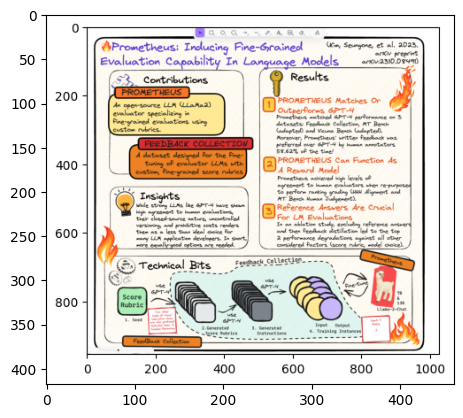

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./data/images/prometheus_paper_card.png")
plt.imshow(img)

In [ ]:
embed_model = VoyageEmbedding(
    voyage_api_key="<YOUR_VOYAGE_API_KEY>",
    model_name="voyage-multimodal-3",
    truncation=False,
)

##### Image Embeddings

In [ ]:
embeddings = embed_model.get_image_embedding(
    "./data/images/prometheus_paper_card.png"
)

print(len(embeddings))
print(embeddings[:5])

1024
[0.06298828125, -0.0206298828125, 0.01055908203125, 0.0072021484375, 0.0269775390625]


##### Text Embeddings

In [ ]:
embeddings = embed_model.get_text_embedding("prometheus evaluation model")

print(len(embeddings))
print(embeddings[:5])

1024
[0.12255859375, -0.0277099609375, 0.028076171875, 0.035888671875, 0.0262451171875]
